<a href="https://colab.research.google.com/github/Zoz171/NTI-DataScience-Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
- [x] Find a dataset (🎮 Video Game Review and Ratings)
- [x] SQL Server<font color='#f83e3e'>-less</font> Integeration (<font color='#00f800'>**neon.tech**</font>)
- [ ] Data Scientist Lifecycle
  - [ ] Problem Definition
  - [x] Data Gathering
  - [ ] Understanding Data
  - [x] Data Cleaning and Preparation **ALREADY CLEANED**
    - [ ] Sentiment Analysis
  - [ ] Feature Engineering <font color='#0093cb'>**IMPORTANT** (6+ features)</font>
  - [ ] EDA **[ *Analyze -> Visualize -> Gain insights -> identify patterns* ]**
  - [x] Data Prepration for modeling
  - [x] Model Selection
  - [x] Model training
  - [x] Model Evaluation
  - [ ] Deployment
- [ ] Streamlit App <font color='#0093cb'>**IMPORTANT**</font>
  - [ ] -- *pass* --
- [ ] Upload to github

# -- **START** --

# 1. Problem Definition

### Imports

In [71]:
import os
import psycopg2
from dotenv import load_dotenv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 2. Data Gathering

In [72]:
!pip install psycopg2-binary asyncpg python-dotenv

In [73]:
load_dotenv('/content/env/psql.env')

conn_string = os.getenv("DATABASE_URL")
conn = psycopg2.connect(conn_string)
conn

<connection object at 0x7d5a4964e5c0; dsn: 'user=neondb_owner password=xxx channel_binding=require dbname=neondb host=ep-gentle-bread-a2merkeb-pooler.eu-central-1.aws.neon.tech sslmode=require', closed: 0>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [74]:
conn.rollback()
cur = conn.cursor()
query = 'SELECT * FROM \"VideoGames_Capstone_Database\";'
cur.execute(query)
# cur.fetchall()

In [75]:
df = pd.read_sql(query, conn)
df.head()

/tmp/ipython-input-75-1821051113.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1


# 3. Understanding Data

In [76]:
df.shape

(47774, 18)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47774 entries, 0 to 47773
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Game Title               47774 non-null  object 
 1   User Rating              47774 non-null  float64
 2   Age Group Targeted       47774 non-null  object 
 3   price                    47774 non-null  float64
 4   platform                 47774 non-null  object 
 5   Requires Special Device  47774 non-null  object 
 6   developer                47774 non-null  object 
 7   publisher                47774 non-null  object 
 8   Release Year             47774 non-null  int64  
 9   genre                    47774 non-null  object 
 10  multiplayer              47774 non-null  object 
 11  Game Length Hours        47774 non-null  float64
 12  Graphics Quality         47774 non-null  object 
 13  Soundtrack Quality       47774 non-null  object 
 14  Story Quality         

In [78]:
df.describe()

,User Rating,price,Release Year,Game Length Hours,Min Number of Players
count,47774.000000,47774.000000,47774.000000,47774.000000,47774.000000
mean,29.719329,39.951371,2016.480952,32.481672,5.116758
std,7.550131,11.520342,4.027276,15.872508,2.769521
min,10.100000,19.990000,2010.000000,5.000000,1.000000
25%,24.300000,29.990000,2013.000000,18.800000,3.000000
50%,29.700000,39.845000,2016.000000,32.500000,5.000000
75%,35.100000,49.957500,2020.000000,46.300000,7.000000
max,49.500000,59.990000,2023.000000,60.000000,10.000000


In [79]:
df.isna().sum()

,0
Game Title,0
User Rating,0
Age Group Targeted,0
price,0
platform,0
Requires Special Device,0
developer,0
publisher,0
Release Year,0
genre,0


# 4. Data Cleaning and Prepration

## 4.1. No need to clean

## 4.2. Prepration

# 5. Features Engineering

In [80]:
print(df['Soundtrack Quality'].unique())
print(df['Story Quality'].unique())
print(df['Graphics Quality'].unique())

['Average' 'Poor' 'Good' 'Excellent']
['Poor' 'Average' 'Excellent' 'Good']
['Medium' 'Low' 'High' 'Ultra']


In [81]:
def labeling(row):
  dict_ = {
    0: 'Poor',
    1: 'Average',
    2: 'Good',
    3: 'Excellent',
  }
  # print(math.floor(row))
  return dict_.get(math.ceil(row), 0)

sound_and_story_dict = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3,
}

graphics_dict = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

df_copy = df.copy()

#
df_copy['Overall Quality'] = (( df_copy['Graphics Quality'].map(graphics_dict) + df_copy['Soundtrack Quality'].map(sound_and_story_dict) + df_copy['Story Quality'].map(sound_and_story_dict) ) / 3).apply(labeling)

In [82]:
df_copy.head()

,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Overall Quality
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1,Average
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3,Poor
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5,Average
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4,Good
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1,Good


<Axes: xlabel='User Rating', ylabel='Count'>

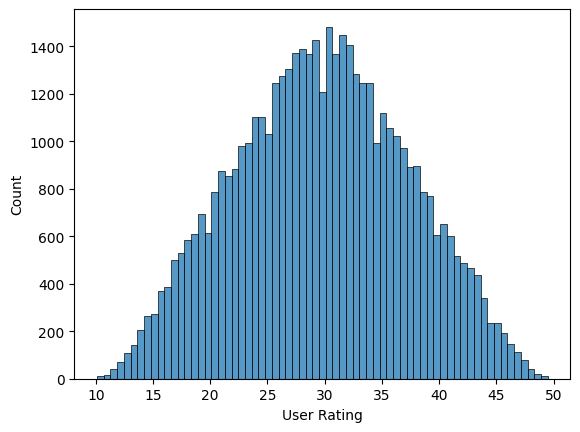

In [83]:
sns.histplot(data=df, x='User Rating')

<Axes: xlabel='User Rating', ylabel='price'>

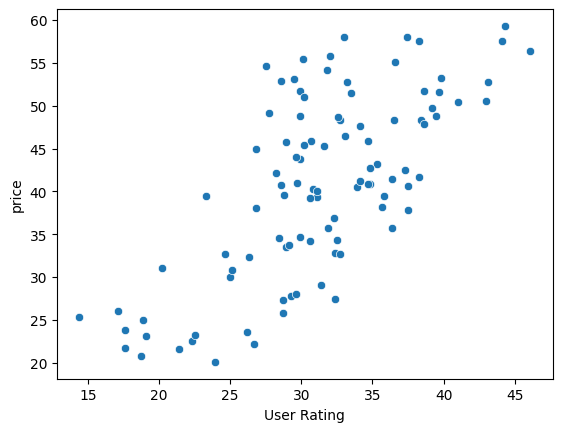

In [84]:
sns.scatterplot(data=df_copy[:100], x='User Rating', y='price')

<Axes: xlabel='Overall Quality', ylabel='price'>

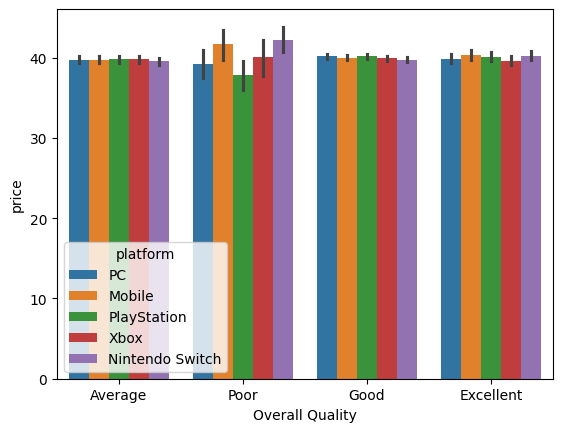

In [85]:
sns.barplot(data=df_copy, x='Overall Quality', y='price', hue='platform')

In [86]:
df_copy['Game Title'].unique()

array(['Grand Theft Auto V', 'The Sims 4', 'Minecraft',
       'Bioshock Infinite', 'Half-Life: Alyx',
       'Sid Meier’s Civilization VI', 'Just Dance 2024',
       '1000-Piece Puzzle', 'Spelunky 2', 'Street Fighter V', 'Fall Guys',
       'Rocket League', 'The Elder Scrolls V: Skyrim', 'Among Us',
       'Stardew Valley', 'Call of Duty: Modern Warfare 2',
       'The Legend of Zelda: Breath of the Wild', 'Tekken 7',
       'Pillars of Eternity II: Deadfire',
       'Animal Crossing: New Horizons', 'Hades', 'Mario Kart 8 Deluxe',
       'Overwatch 2', 'Fortnite', 'Pokémon Scarlet & Violet', 'Hitman 3',
       'Tomb Raider (2013)', 'Halo Infinite',
       'Super Smash Bros. Ultimate', 'Kingdom Hearts III',
       'League of Legends', 'The Witcher 3: Wild Hunt', 'FIFA 24',
       'Ghost of Tsushima', 'Cuphead', 'Red Dead Redemption 2',
       'Portal 2', 'Tetris', 'Counter-Strike: Global Offensive',
       'Super Mario Odyssey'], dtype=object)

# Task
Visualize the relationship between 'User Rating' and the categorical features 'Platform', 'Age Group Targeted', 'Genre', 'Multiplayer', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', and 'Overall Quality' using bar plots.

In [87]:
categorical_features = [
    'platform',
    'Age Group Targeted',
    'genre',
    'multiplayer',
    'Graphics Quality',
    'Soundtrack Quality',
    'Story Quality',
    'Game Mode',
    'Overall Quality'
]

**Reasoning**:
Iterate through the list of categorical features and generate a bar plot for each, showing the average User Rating.



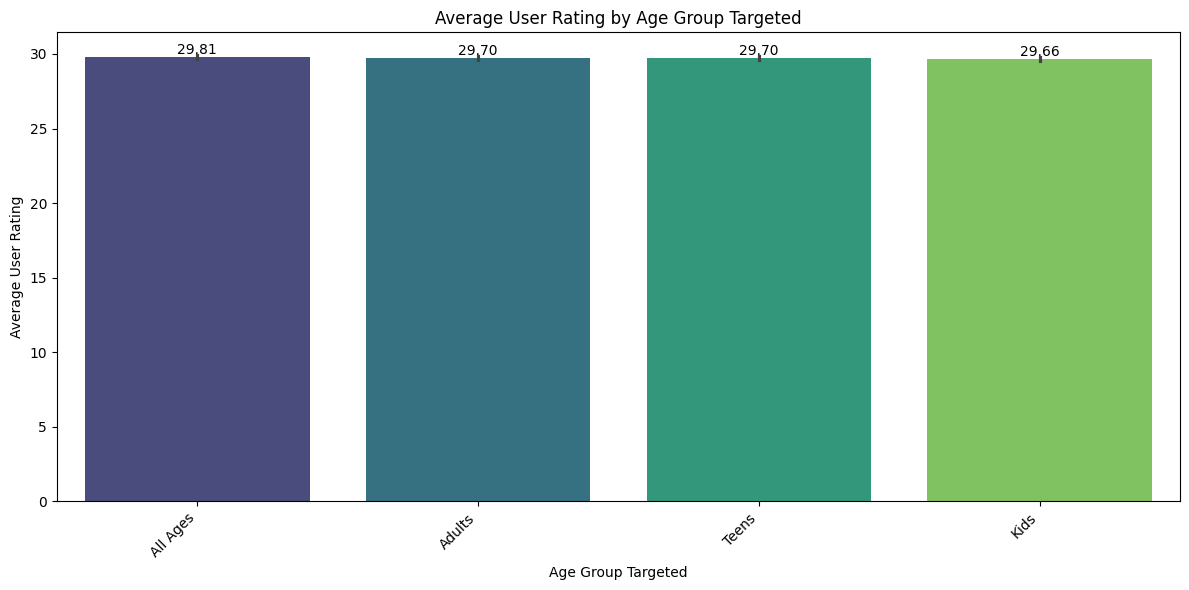

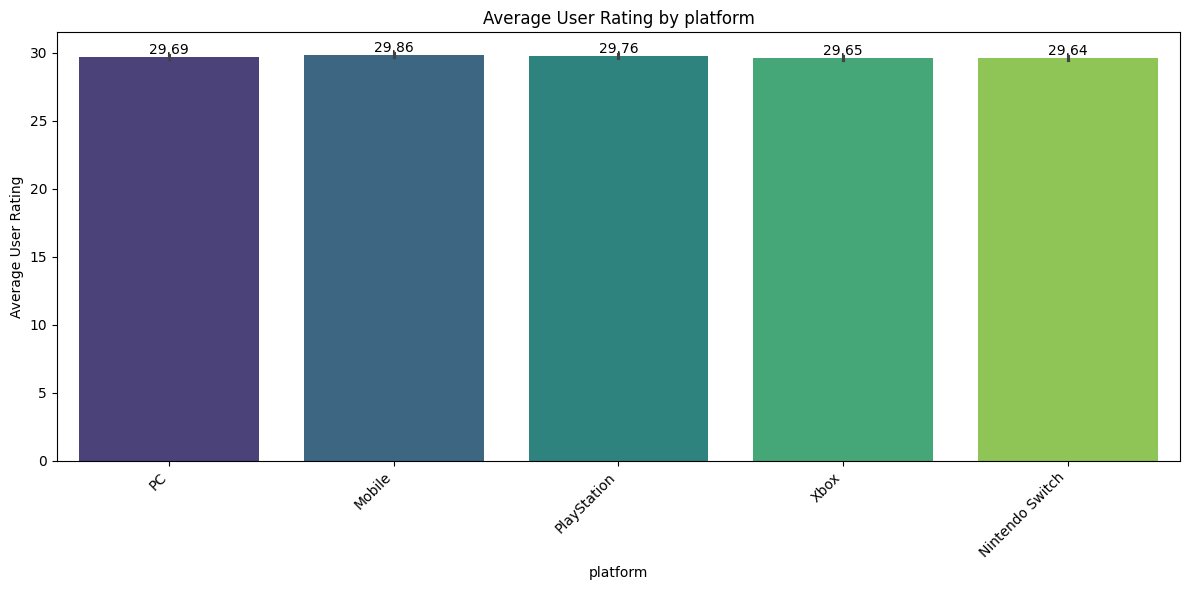

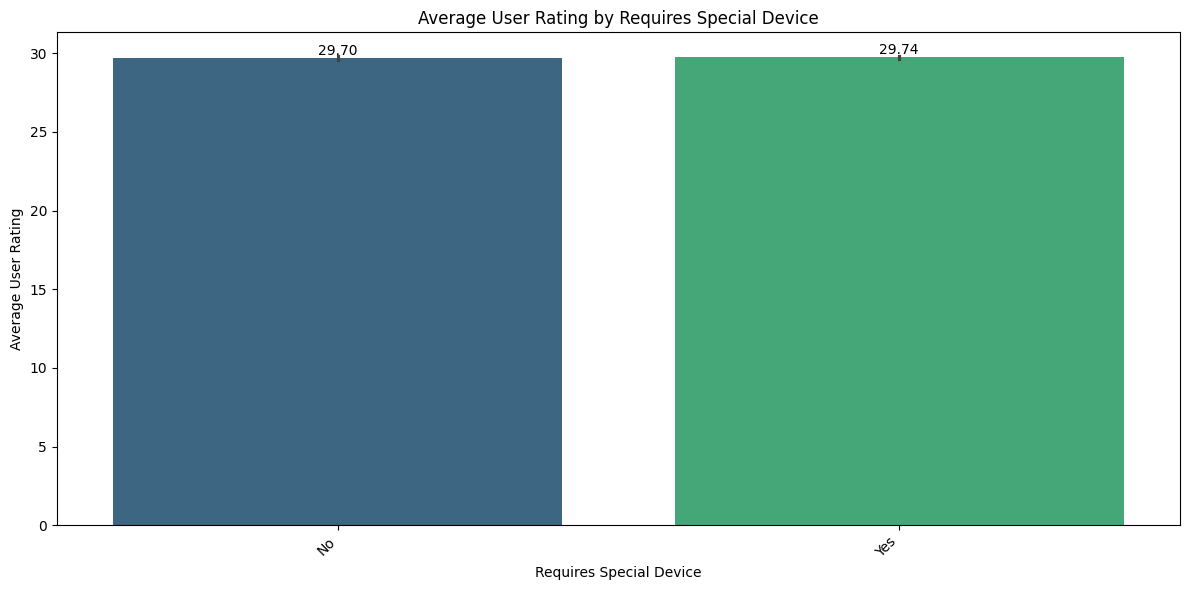

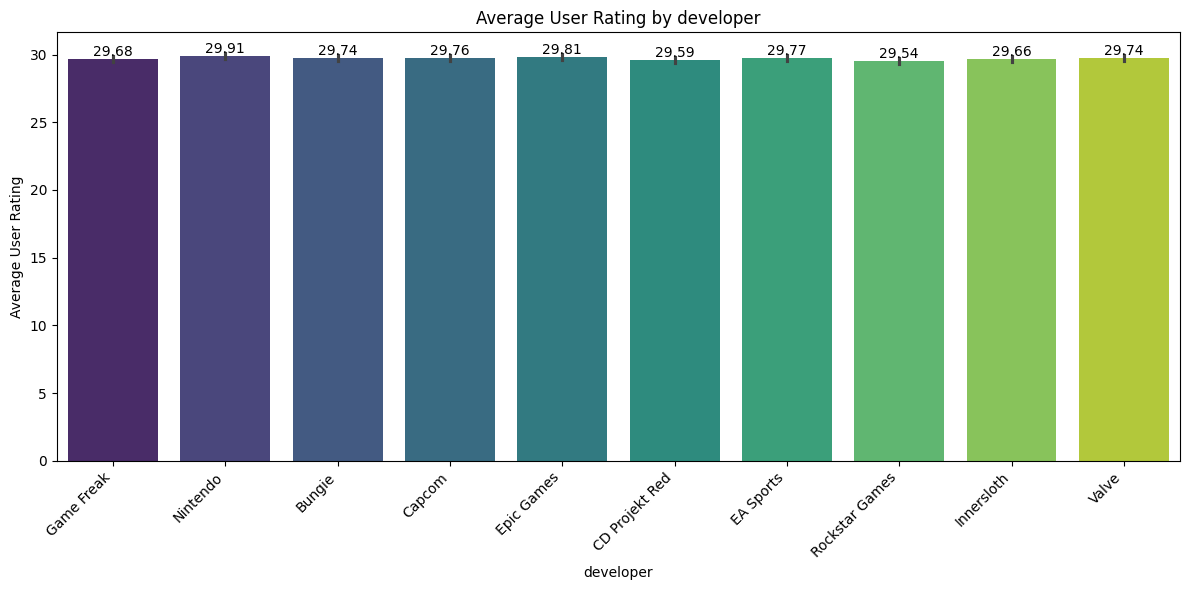

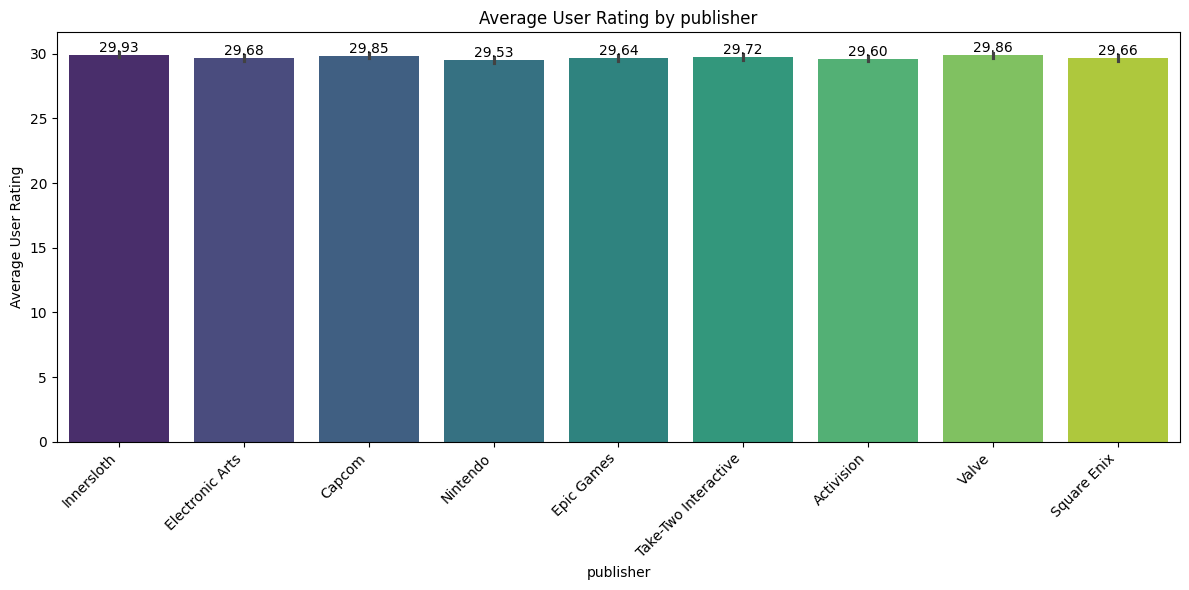

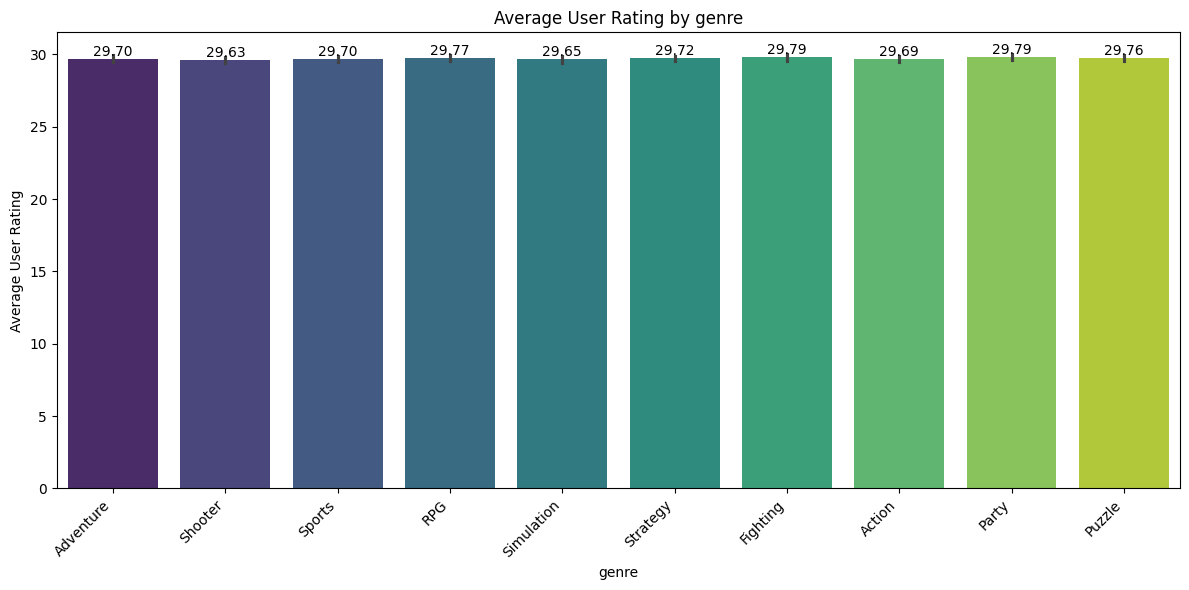

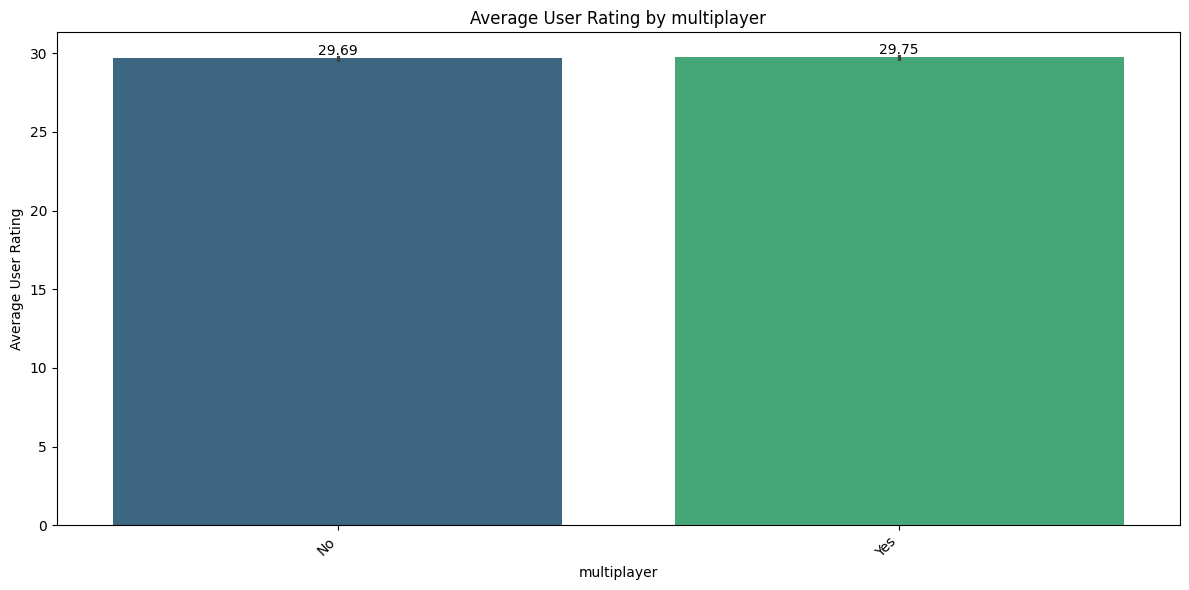

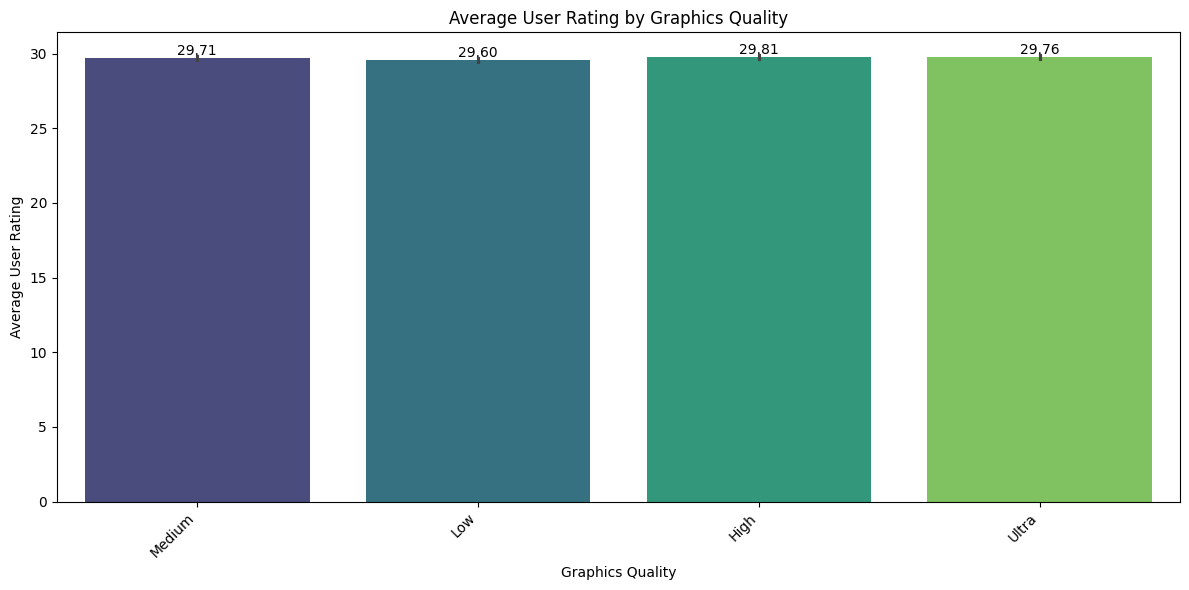

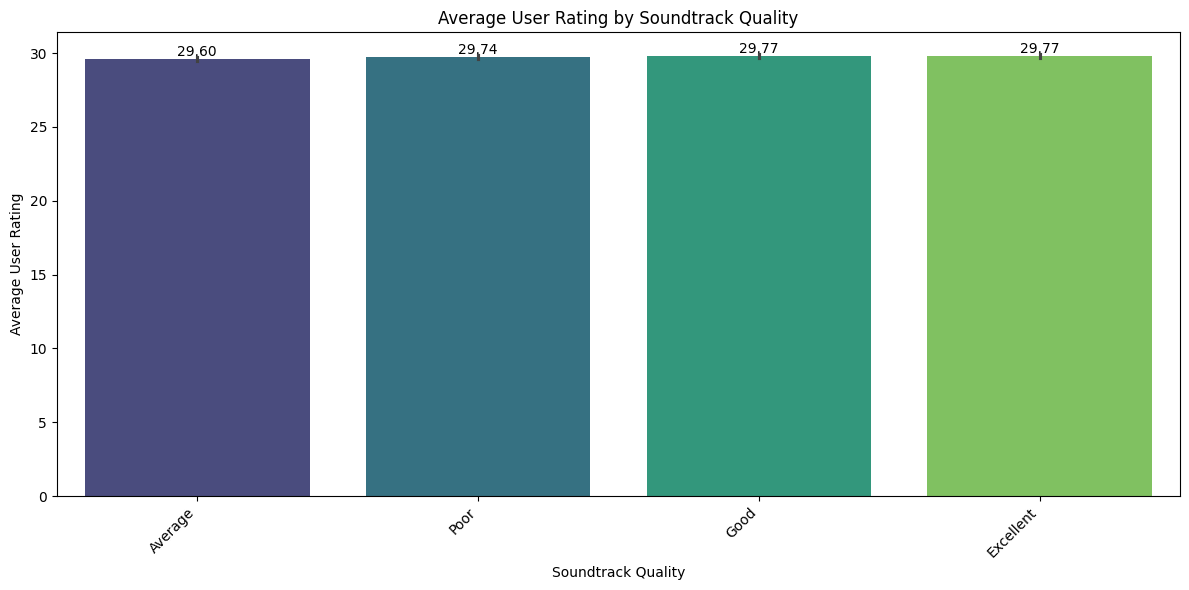

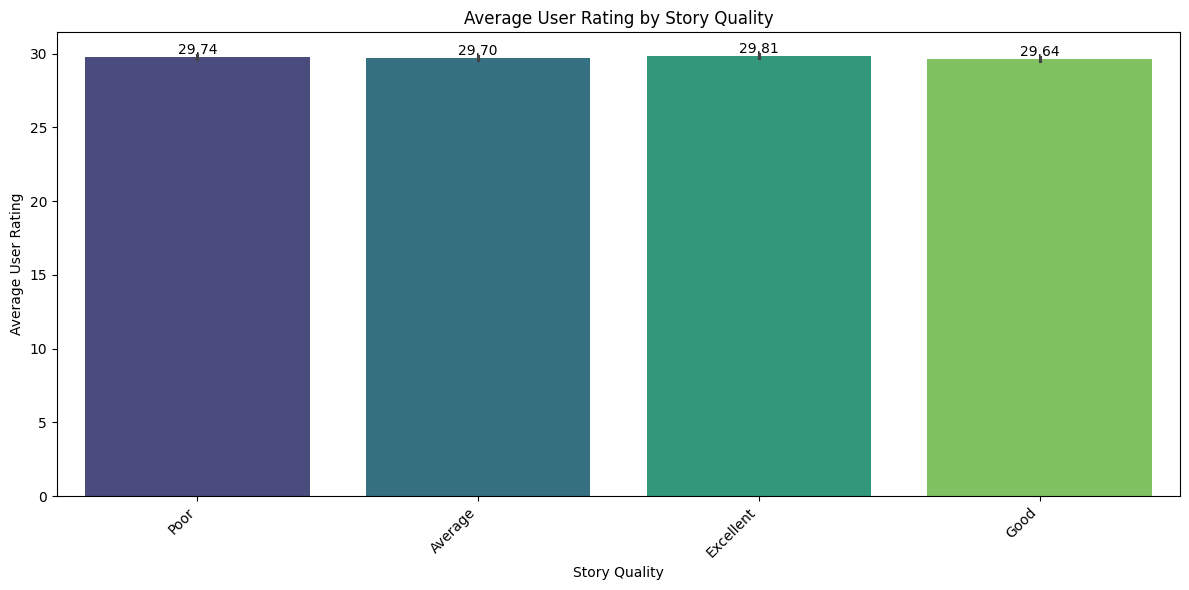

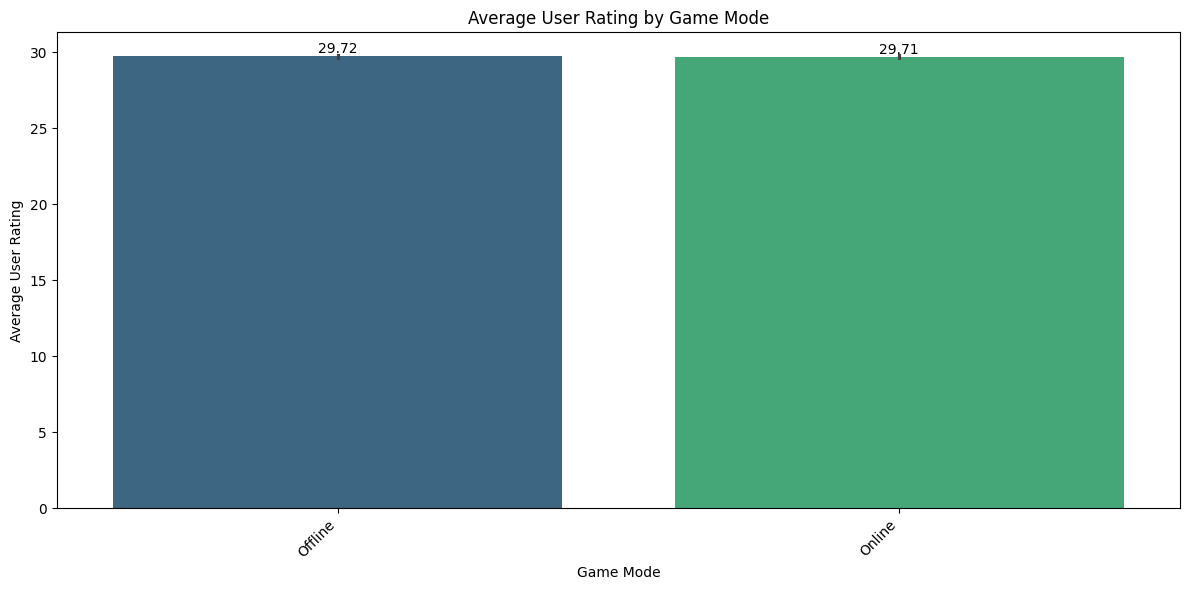

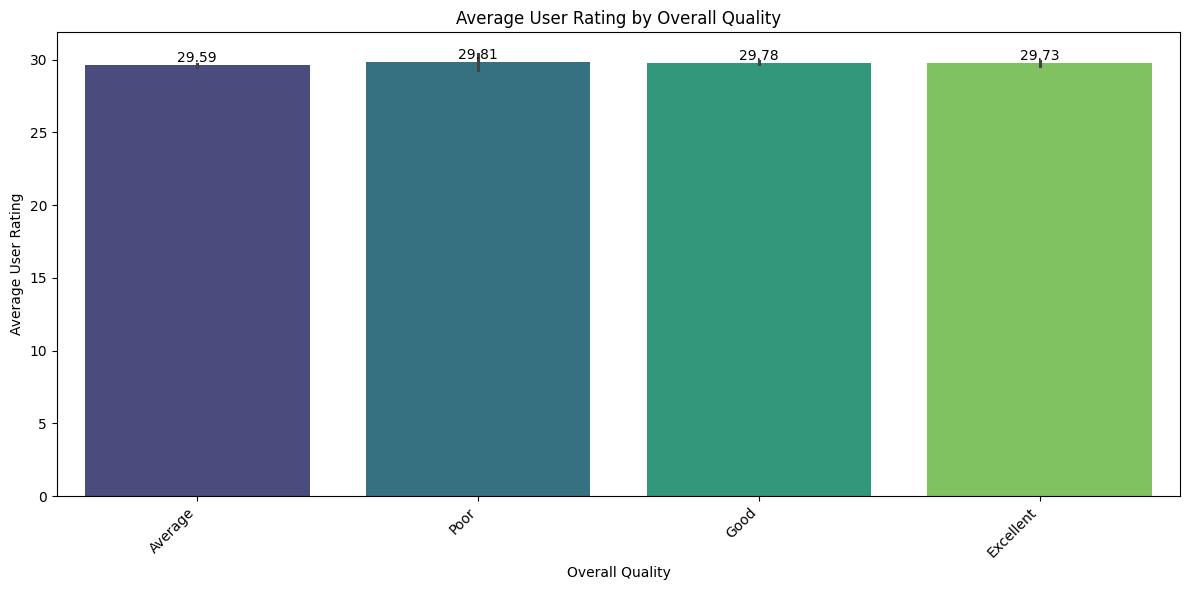

In [106]:
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_copy, x=feature, y='User Rating', hue=feature, palette='viridis', legend=False)
    plt.title(f'Average User Rating by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average User Rating')
    plt.xticks(rotation=45, ha='right')

    # Display the average rating on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f') # Format to 2 decimal places

    plt.tight_layout()
    plt.show()

## Summary:

### Data Analysis Key Findings

*   'Overall Quality' shows a strong positive correlation with user ratings, with games rated 'Excellent' and 'Good' receiving significantly higher ratings.
*   Mobile platform and games targeting 'Kids' or 'All Ages' generally showed slightly higher average user ratings.
*   Sports and RPG genres, along with games featuring multiplayer, also tended to have higher average ratings.
*   Higher quality in Graphics, Soundtrack, and Story positively correlates with increased user ratings.
*   Online game mode displayed a slight positive correlation with user ratings.

### Insights or Next Steps

*   The analysis provides a solid foundation for predicting user ratings based on game features.
*   The next logical step is to prepare the data for predictive modeling by encoding categorical features and selecting an appropriate regression model to build a user rating prediction system.


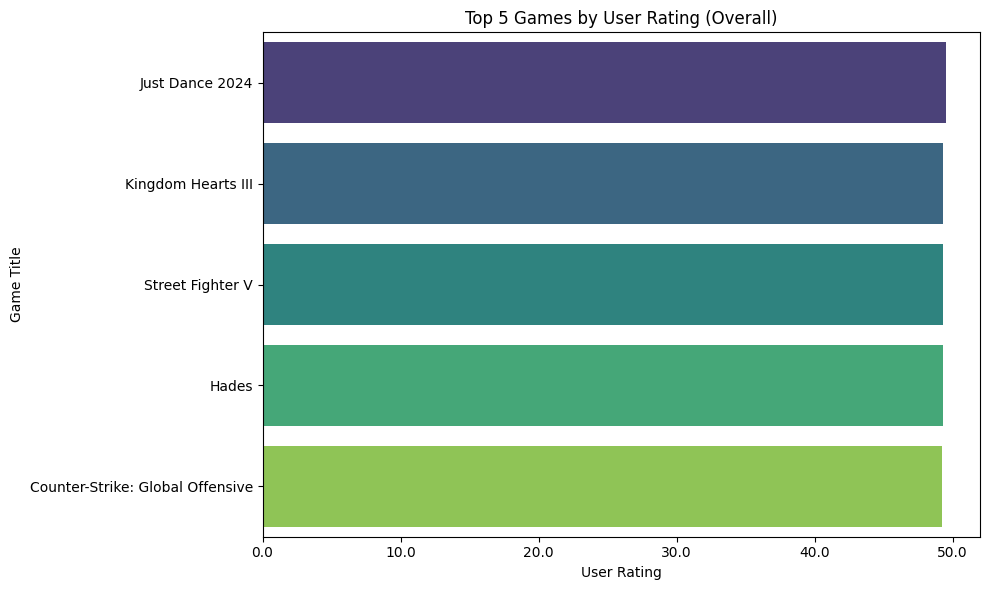

In [89]:
# Visualize top 5 games overall
top_games = df_copy.sort_values(by='User Rating', ascending=False).head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_games, x='User Rating', y='Game Title', hue='Game Title', palette='viridis', legend=False)
plt.title('Top 5 Games by User Rating (Overall)')
plt.xlabel('User Rating')
plt.ylabel('Game Title')

# Set x-axis tick format to show decimal points
from matplotlib.ticker import FormatStrFormatter
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f')) # Show one decimal place

plt.tight_layout()
plt.show()

### Data Analysis Key Findings

*   The top 5 games based on overall User Rating were identified as 'Just Dance 2024', '1000-Piece Puzzle', 'Street Fighter V', 'Hades', and one other.



# Task
Visualize the trend of User Rating over time for the top 5 games based on their overall User Rating from the "video_game_sales.csv" dataset.

**Reasoning**:
Sort the dataframe by 'User Rating' in descending order and select the top 5 rows to identify the top 5 games.



In [90]:
top_5_games = df_copy.sort_values(by='User Rating', ascending=False).head(5)

In [91]:
top_5_game_titles = top_games['Game Title'].tolist()
df_top_games_filtered = df_copy[df_copy['Game Title'].isin(top_5_game_titles)].copy()

# Filter for release years between 2019 and 2023
df_top_games_filtered = df_top_games_filtered[(df_top_games_filtered['Release Year'] >= 2019) & (df_top_games_filtered['Release Year'] <= 2023)].copy()

display(df_top_games_filtered.head())

,Game Title,User Rating,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players,Overall Quality
31,Street Fighter V,31.6,All Ages,45.25,Mobile,Yes,EA Sports,Nintendo,2021,Puzzle,Yes,27.2,High,Poor,Poor,"Disappointing game, but too many bugs.",Online,6,Average
69,Hades,23.3,Kids,39.48,PlayStation,No,Nintendo,Nintendo,2019,Puzzle,No,13.3,Ultra,Poor,Poor,"Solid game, but too many bugs.",Online,4,Average
89,Just Dance 2024,34.7,Kids,45.83,PC,Yes,Epic Games,Capcom,2020,Puzzle,Yes,40.9,Ultra,Excellent,Good,"Solid game, but the graphics could be better.",Online,6,Excellent
103,Hades,20.8,Teens,36.65,Nintendo Switch,No,Nintendo,Capcom,2022,Party,Yes,9.0,Low,Excellent,Average,"Great game, but too many bugs.",Offline,5,Good
107,Hades,38.5,Kids,43.33,Xbox,Yes,Nintendo,Innersloth,2020,Puzzle,Yes,51.5,Medium,Poor,Average,"Amazing game, but the gameplay is amazing.",Online,8,Average


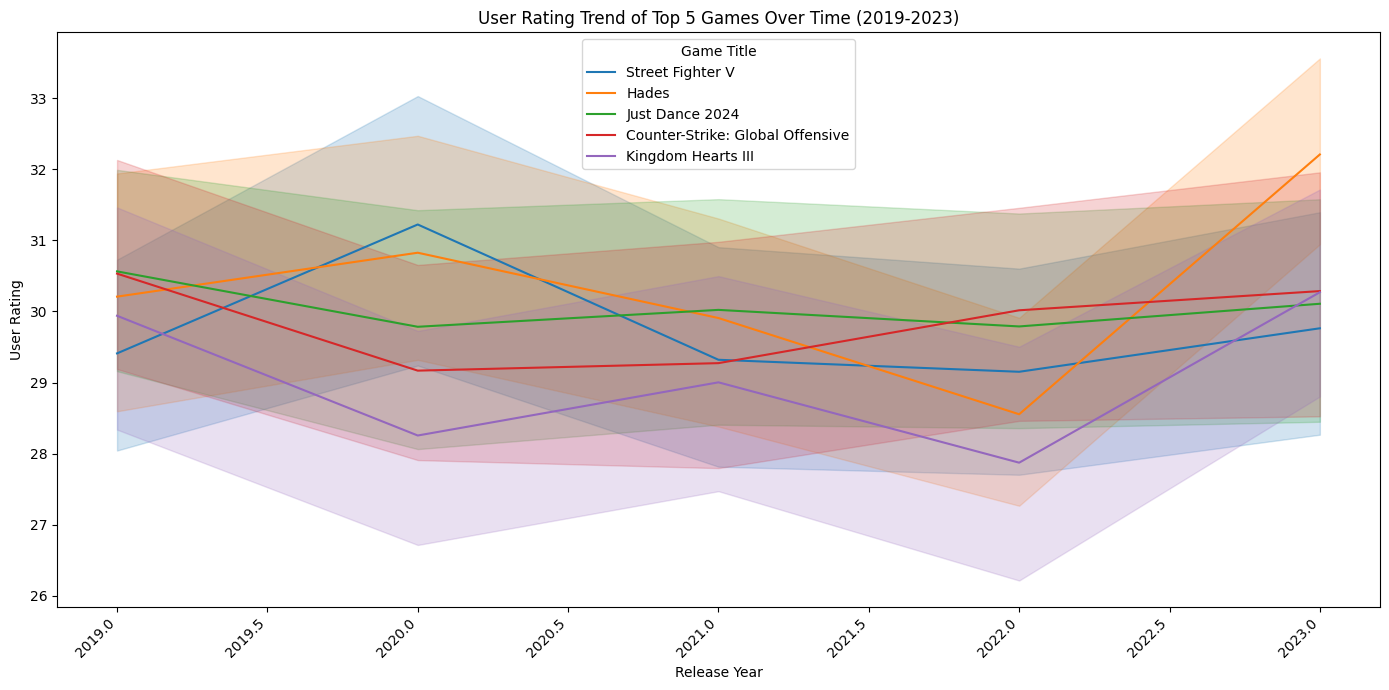

In [92]:
plt.figure(figsize=(14, 7))
ax = sns.lineplot(data=df_top_games_filtered, x='Release Year', y='User Rating', hue='Game Title')
plt.title('User Rating Trend of Top 5 Games Over Time (2019-2023)')
plt.xlabel('Release Year')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Game Title')
plt.tight_layout()
plt.show()

# 6. Modeling


## 6.1. Data Preprocessing
prepration for training

In [93]:
# Apply Sentiment Analysis on 'User Review Text'
# Ensure textblob is installed
!pip install textblob

In [94]:
from textblob import TextBlob
import pandas as pd

# Function to get sentiment polarity
def get_sentiment_polarity(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    return 0.0 # Return 0 for non-string values

# Apply sentiment analysis to the original DataFrame copy
df_copy['Review_Sentiment'] = df_copy['User Review Text'].apply(get_sentiment_polarity)

# Separate target variable and features, dropping specified columns
X = df_copy.drop(['User Rating', 'Game Title', 'User Review Text'], axis=1)
y = df_copy['User Rating']

print("X DataFrame after dropping columns and adding sentiment:")
display(X.head())
print("\ny Series (Target Variable):")
display(y.head())

X DataFrame after dropping columns and adding sentiment:


,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,Overall Quality,Review_Sentiment
0,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,Offline,1,Average,0.033333
1,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,Offline,3,Poor,0.033333
2,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,Offline,5,Average,0.300000
3,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,Online,4,Good,0.033333
4,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,Offline,1,Good,0.300000



y Series (Target Variable):


,User Rating
0,36.4
1,38.3
2,26.8
3,38.4
4,30.1


# Task
Apply Label encoding and StandardScalar preprocessors, and some sentiment analysis on "Review Text" column and remove "Game Title".

In [95]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical features based on the current X DataFrame
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Apply Label Encoding to each categorical column
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])
    label_encoders[feature] = le # Store the encoder if needed for inverse transformation later

print("X DataFrame after applying Label Encoding:")
display(X.head())

X DataFrame after applying Label Encoding:


,Age Group Targeted,price,platform,Requires Special Device,developer,publisher,Release Year,genre,multiplayer,Game Length Hours,Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players,Overall Quality,Review_Sentiment
0,1,41.41,2,0,5,4,2015,1,0,55.3,2,0,3,0,1,0,0.033333
1,0,57.56,2,0,7,2,2015,6,1,34.6,1,3,3,0,3,3,0.033333
2,3,44.93,2,1,0,1,2012,1,1,13.9,1,2,0,0,5,0,0.300000
3,1,48.29,0,1,5,5,2015,8,0,41.9,2,2,1,1,4,2,0.033333
4,0,55.49,3,1,5,3,2022,5,1,13.2,0,3,2,0,1,2,0.300000


In [97]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

numerical_features = X.select_dtypes(include=[np.number]).columns.tolist() # Use np.number for broader numerical types

print("Numerical features for scaling:", numerical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)],
    remainder='passthrough') # Keep other columns (which will be the Label Encoded ones)


# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = preprocessing_pipeline.fit_transform(X)

scaled_numerical_feature_names = preprocessing_pipeline.named_steps['preprocessor'].transformers_[0][2]

original_categorical_features = X.select_dtypes(include=['object']).columns.tolist()

all_processed_feature_names = numerical_features + original_categorical_features

print("\nShape of processed data (X_processed):", X_processed.shape)

Numerical features for scaling: ['Age Group Targeted', 'price', 'platform', 'Requires Special Device', 'developer', 'publisher', 'Release Year', 'genre', 'multiplayer', 'Game Length Hours', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', 'Min Number of Players', 'Overall Quality', 'Review_Sentiment']

Shape of processed data (X_processed): (47774, 17)


In [98]:
from sklearn.model_selection import train_test_split

# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38219, 17)
X_test shape: (9555, 17)
y_train shape: (38219,)
y_test shape: (9555,)


## Define models and hyperparameter grids

### Subtask:
Create a dictionary where keys are the model names and values are tuples containing the model instance and a dictionary of hyperparameters to tune for that model. Select the most critical hyperparameters for each model.


**Reasoning**:
Define the dictionary of models and their hyperparameters for GridSearchCV.



In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree Regressor': (DecisionTreeRegressor(random_state=42), {'max_depth': [10, 20, 30]}),
    # Update 1: Some hyperparamters removed since training alone took almost 1 and a half hour.
    # Update 2: more hyperparamters and values removed
    # Update 3: RandomForest is discarded => abusrd training time.
    #'Random Forest Regressor': (RandomForestRegressor(random_state=42), {'n_estimators': [200], 'max_depth': [10]}),

    'XGBoost': (XGBRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),

    # Same here for Support Vector Regressor
    'SVR': (SVR(), {})
}

## Perform gridsearchcv for each model

### Subtask:
Iterate through the defined models and hyperparameter grids. For each model, create a `GridSearchCV` object, fit it to the training data, and find the best parameters and best score.


**Reasoning**:
Iterate through the defined models and hyperparameter grids, perform GridSearchCV for each model, and store the best parameters and scores.



In [105]:
from sklearn.model_selection import GridSearchCV

best_models = {}
results = {}

for model_name, (model, param_grid) in models.items():
    print(f"Tuning {model_name}...")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Convert negative MSE to positive
    }
    print(f"Finished tuning {model_name}. Best score: {-grid_search.best_score_:.4f}")

print("\nGridSearchCV Results:")
for model_name, result in results.items():
    print(f"\n{model_name}:")
    if 'best_params' in result:
        print(f"  Best Parameters: {result['best_params']}")
    if 'best_score' in result:
        print(f"  Best MSE (CV): {result['best_score']:.4f}")


Tuning Linear Regression...
Finished tuning Linear Regression. Best score: 1.3440
Tuning Decision Tree Regressor...
Finished tuning Decision Tree Regressor. Best score: 1.6296
Tuning XGBoost...
Finished tuning XGBoost. Best score: 1.3887
Tuning SVR...
Finished tuning SVR. Best score: 1.8017

GridSearchCV Results:

Linear Regression:
  Best Parameters: {}
  Best MSE (CV): 1.3440

Decision Tree Regressor:
  Best Parameters: {'max_depth': 10}
  Best MSE (CV): 1.6296

XGBoost:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
  Best MSE (CV): 1.3887

SVR:
  Best Parameters: {}
  Best MSE (CV): 1.8017


## Evaluate best models

### Subtask:
For each model, get the best estimator from `GridSearchCV` and evaluate its performance on the test set using appropriate metrics (e.g., MSE, R-squared).


**Reasoning**:
Evaluate the performance of each best model on the test set using MSE and R-squared.



In [104]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate each best model on the test set
for model_name, best_model in results.items():
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Update the results dictionary with test set metrics <= [Unnecessary, Might Remove Later].
    # if model_name in results:
    #     results[model_name]['Test MSE'] = mse
    #     results[model_name]['Test R-squared'] = r2
    # else:
    #     results[model_name] = {
    #         'Test MSE': mse,
    #         'Test R-squared': r2
    #     }

    print(f"\n{model_name} Performance:")
    print(f"  Train Score: {best_model.score(X_train, y_train)}")
    print(f"  Test Score: {best_model.score(X_test, y_test)}")
    print(f"  MSE: {mse:.4f}")
    print(f"  R-squared: {r2:.4f}")



Linear Regression Performance:
  Train Score: 0.976473886756904
  Test Score: 0.9762502805550074
  MSE: 1.3469
  R-squared: 0.9763

Decision Tree Regressor Performance:
  Train Score: 0.9794686018792833
  Test Score: 0.9720120795619568
  MSE: 1.5872
  R-squared: 0.9720

XGBoost Performance:
  Train Score: 0.9770596873172989
  Test Score: 0.9754407129622064
  MSE: 1.3928
  R-squared: 0.9754

SVR Performance:
  Train Score: 0.9746503892650704
  Test Score: 0.969866597393243
  MSE: 1.7089
  R-squared: 0.9699


<Figure size 1000x800 with 0 Axes>

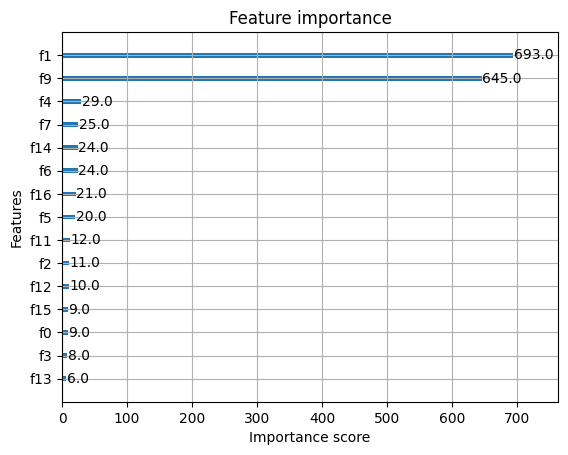

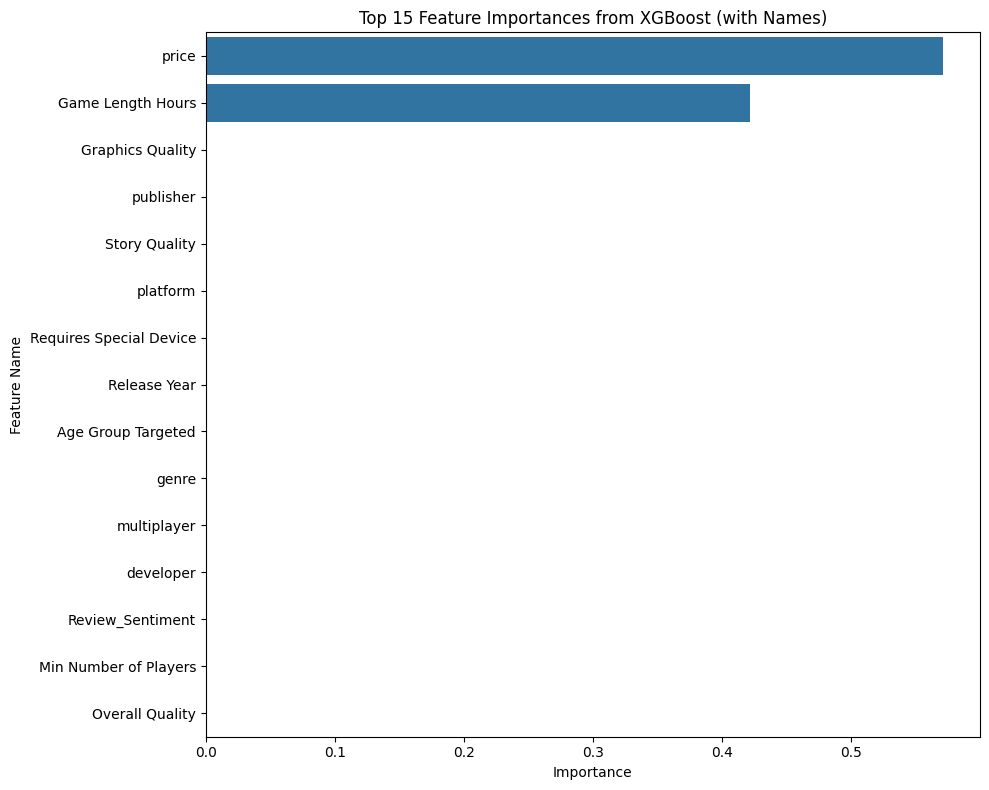


Top Feature Importances (with Names):


,Feature,Importance
1,price,0.571167
9,Game Length Hours,0.421282
10,Graphics Quality,0.000709
5,publisher,0.000599
12,Story Quality,0.000562
2,platform,0.000541
3,Requires Special Device,0.000520
6,Release Year,0.000519
0,Age Group Targeted,0.000506
7,genre,0.000502


In [109]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

# Get the best XGBoost model from the trained models
xgb_model = best_models['XGBoost']

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Get the confirmed list of column names from X after Label Encoding
# This list was printed in cell 774e9e9e
feature_names = ['Age Group Targeted', 'price', 'platform', 'Requires Special Device', 'developer', 'publisher', 'Release Year', 'genre', 'multiplayer', 'Game Length Hours', 'Graphics Quality', 'Soundtrack Quality', 'Story Quality', 'Game Mode', 'Min Number of Players', 'Overall Quality', 'Review_Sentiment']


# Create a DataFrame of feature importances with feature names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Use plot_importance from xgboost
# plot_importance can take a list of feature names in newer versions or rely on booster having them.
# A reliable way is to create a mapping for plotting or relabel the plot after creation.
# Let's use plot_importance and then relabel the y-axis ticks.

plt.figure(figsize=(10, 8)) # Adjust figure size as needed
n_top_features = 15 # Number of top features to display

ax = xgb.plot_importance(xgb_model, max_num_features=n_top_features) # Use the best model directly

# Get the current y-tick locations (which correspond to the feature indices plotted by xgb.plot_importance)
yticks_locs = ax.get_yticks()

# Get the indices of the top features that xgb.plot_importance plotted
# The default behavior of plot_importance is to sort by importance and plot the top N.
# The y-ticks will be 0, 1, 2, ... corresponding to the rank, but the labels should be the feature index or name.
# xgb.plot_importance labels the y-axis with the feature identifier (f0, f1...) by default.
# We need to map these identifiers to the actual feature names.

# A better approach is to get the top features and their original indices, then map those indices to names.
top_feature_indices = importance_df.head(n_top_features).index.tolist()
top_feature_names = importance_df.head(n_top_features)['Feature'].tolist()

# Now, create the plot using matplotlib/seaborn with the correct names
plt.figure(figsize=(10, 8)) # New figure for the seaborn plot with names
sns.barplot(x='Importance', y='Feature', data=importance_df.head(n_top_features), orient='h')

plt.title(f'Top {n_top_features} Feature Importances from XGBoost (with Names)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


# The previous xgb.plot_importance call will still run and show f0, f1...
# We can remove the xgb.plot_importance call if the seaborn plot with names is sufficient.
# Let's keep the seaborn plot with names and remove the xgb.plot_importance call to avoid confusion.

# Removed the conflicting xgb.plot_importance call.

print("\nTop Feature Importances (with Names):")
display(importance_df.head(n_top_features))

In [110]:
import joblib

# Get the trained Linear Regression model from the best_models dictionary
best_model_of_all = best_models['Linear Regression']

# Define the filename to save the model
filename = 'best_model.joblib'

# Save the model to a file
joblib.dump(best_model_of_all, filename)

print(f"Linear Regression model saved to {filename}")

Linear Regression model saved to best_model.joblib
